# Curso de Estadística computacional con Python

## Objetivos

* Aprender cuándo utilizar Programación Dinámica y estocástica
* Enteder la diferencia entre programas deterministas y estocásticos
* Aprender a utilizar Programación Estocástica
* Aprender a crear simulaciones computacionales válidas


## Programación Dinámica

### Introducción a la programación dinámica

Richard Ernest Bellman (1920–1984) fue un matemático aplicado, cuya mayor contribución fue la metodología denominada programación dinámica.

La historia empieza en la decada de los 50s, Richard Bellman le acuña el nombre de Programación Dinámica para obtener financiamiento en sus investigaciones matemáticas. Actualmente, la programación dinámica es una de las técnicas más poderosas en Computer Science para optimizar ciertos tipos de problemas. Los problemas que puede optimizar son aquellos que tienen una subestructura óptima, esto significa que una solución óptima global se puede encontrar al combinar soluciones óptimas de subproblemas locales. Estos problemas requieren entonces:
* Subestructura Óptima. Una solución global óptima se puede encontrar al combinar soluciones óptimas de subproblemas locales. Por ejemplo, cuando estamos haciendo merge sort (Organizacion por mezcla) y dividimos la lista en listas cada vez más pequeñas, estamos aplicando este concepto.
* Problemas empalmados. Una solución óptima que involucra resolver el mismo problema en varias ocasiones. En la llamada recursiva tradicional de Fibonacci, cuando se resuelve un problema una y otra vez, estamos aplicando este concepto.

Esta optimización se lleva a cabo a través de la **Memoization** (memorizacion). La _Memorización_ es una técnica para evitar computos adicionales al guardar computos previos y evitar realizarlos nuevamente. Normalmente se utiliza un diccionario, donde las consultas se pueden hacer en O(1) (en un diccionario podemos acceder rapidamente a los datos).Con esta técnica intercambiamos tiempo (evitamos volver hacer un mismo computo) por espacio (almacenamos los computos en un diccionario)

### Optimización de Fibonacci

Recordemos que los números de Fibonacci podemos veros como $F_n = F_{n-1} + F_{n-2}$ . Esta característica es facilmente aplicable con nuestra programación recursiva, pero es realmente ineficiente. Si recordamos, su complejidad algoritmica corresponde a un problema $O(2^n)$, es decir, estamos creciendo exponencialmente la cantidad de computo

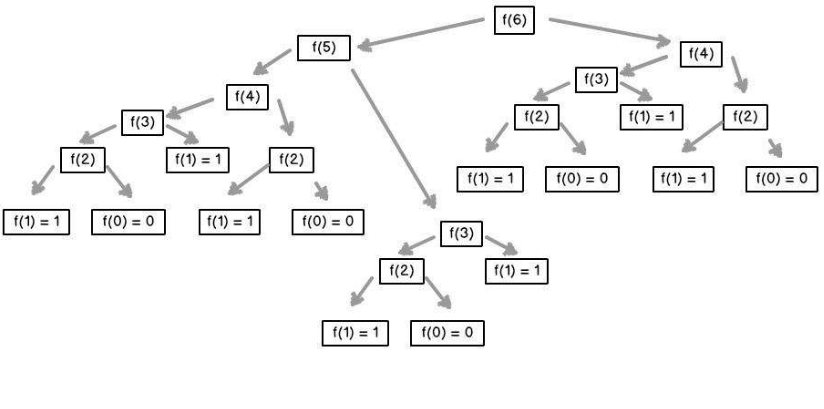


Veamos cómo podemos optimizar nuestra función fibonacci a partir de la programación recursiva y la Memoization. Primero, hagamos un programa que tenga la funcion de fibonacci_recursivo.

In [8]:

def fibonacci_recursivo(n):
    
    if n==0 or n==1:
        return 1
    return fibonacci_recursivo(n-1) + fibonacci_recursivo(n-2)

if __name__ == "__main__":
       
    n = int(input('Escoge un numero: '))
    
    resultado= fibonacci_recursivo(n)
    
    print(resultado)

Escoge un numero: 3
3


Si nosotros intentamos calcular el fibonacci de un numero más grande, podremos ver que el tiempo para calcularlo va aumentando porque el crecimiento de este algoritmo es exponencial. Como se ve en el esquema, cada vez que se necesita de un numero de fibonacci, por ejemplo del 5, este a su vez llama a la funcion fibonacci_recursiva para obtener el valor de 4 y 3. Estos a su vez llaman a la función de nuevo y asi continúa hasta que, al llegar a la condición para entrar en la sentencia if (n = 0 o n =1), comienza a la sustitución de valores. Ahora veamos como podremos implementar una función que sea más eficiente

In [13]:
"""programacion_dinamica.py"""

import sys


def fibonacci_recursivo(n):
    if n==0 or n==1:
        return 1
    
    return fibonacci_recursivo(n-1) + fibonacci_recursivo(n-2)


def fibonacci_dinamico(n,memo={}):
    if n == 0 or n == 1:
        return 1
    
    
    # Cuando no existe memo[n], dará un error del tipo KeyError porque no consigue a n dentro del diccionario.
    #Para ello, se ejecuta Try, except. En lugar de salta el error, ejecuta las lineas de except
    try:
        return memo[n]
    except KeyError:
        resultado = fibonacci_dinamico(n-1,memo) + fibonacci_dinamico(n-2,memo)
        memo[n]=resultado
        
        #Abriendo el cofre 
        print(f'Aqui resultado vale: {resultado}')
        print(f'estamos en la interacion con n= {n}')
        print(f'Por lo que el diciconario es ahora: {memo[n]}')
        print("-"*20)
        
        return resultado


if __name__ == "__main__":
    sys.setrecursionlimit(10002) #Cambiamos el limite de recursion para hacer fibonaccis mas altos
    
    
    n = int(input('Escoge un numero: '))
    
    resultado= fibonacci_dinamico(n)
    
    print(resultado)

Escoge un numero: 10
Aqui resultado vale: 2
estamos en la interacion con n= 2
Por lo que el diciconario es ahora: 2
--------------------
Aqui resultado vale: 3
estamos en la interacion con n= 3
Por lo que el diciconario es ahora: 3
--------------------
Aqui resultado vale: 5
estamos en la interacion con n= 4
Por lo que el diciconario es ahora: 5
--------------------
Aqui resultado vale: 8
estamos en la interacion con n= 5
Por lo que el diciconario es ahora: 8
--------------------
Aqui resultado vale: 13
estamos en la interacion con n= 6
Por lo que el diciconario es ahora: 13
--------------------
Aqui resultado vale: 21
estamos en la interacion con n= 7
Por lo que el diciconario es ahora: 21
--------------------
Aqui resultado vale: 34
estamos en la interacion con n= 8
Por lo que el diciconario es ahora: 34
--------------------
Aqui resultado vale: 55
estamos en la interacion con n= 9
Por lo que el diciconario es ahora: 55
--------------------
Aqui resultado vale: 89
estamos en la inter

Esta implementacion es muy similar, pero en lugar de hacer llamadas una y otra vez, guardamos los resultados dentro de un diccionario. Veremos que con este algoritmo podemos calcular fibonaccis altos y rapidamente. Incluso el de 1000, mientras que el algoritmo anterior se tardaba un tiempo considerable en calcular el fibonacci de, por ejemplo, 50. De esta forma hicimos un algoritmo mucho más eficiente intercambiando tiempo por espacio.


**Abriendo el cofre con los prints statements**

Al abrir el cofre, se observa que con las numerosas llamadas se va reduciendo el valor de n hasta los más pequeños (la  primera iteracion vemos que n llego a un valor de 2, porque en la siguiente llamada debe entrar en el condicional y comienzas las sustituciones). Mientras, se esta formando un diccionario que almacena los valores cuyas llaves serían los n, es decir, las posiciones que ocupan en la serie de Fibonacci, y los valores sería el valor en esa posición. Luego, la variable resultado se encarga de calcular e ir guardando ese valor en nuestro diccionario. Finalmente, cuando se alcanza la posición deseada (el n introducido por el usuario) se retorna ese valor


**Por que usar diccionario y no listas?** Fuente: [Utilizando diccionarios en python](https://uniwebsidad.com/libros/algoritmos-python/capitulo-9/utilizando-diccionarios-en-python)

El algoritmo que usa Python internamente para buscar un elemento en un diccionario es muy distinto que el que utiliza para buscar en listas.

Para buscar en las listas, se utiliza un algoritmos de comparación que tarda cada vez más a medida que la lista se hace más larga. En cambio, para buscar en diccionarios se utiliza un algoritmo llamado hash, que se basa en realizar un cálculo numérico sobre la clave del elemento, y tiene una propiedad muy interesante: sin importar cuántos elementos tenga el diccionario, el tiempo de búsqueda es siempre aproximadamente igual (O(1)).

Este algoritmo de hash es también la razón por la cual las claves de los diccionarios deben ser inmutables, ya que la operación hecha sobre las claves debe dar siempre el mismo resultado, y si se utilizara una variable mutable esto no sería posible.

Recurso adicional: [Recursion, the Fibonacci Sequence and Memoization](https://www.youtube.com/watch?v=Qk0zUZW-U_M)


## Caminos aleatorios

### Que son los caminos aleatorios

Hasta ahora los programas que hemos escrito han sido deterministas. Es decir, al obtener un mismo input, da como resultado un mismo output. Por otro lado, hay problemas que, por su propia naturaleza, incluyen aleatoriedad y debemos saber como incluir estos elementos en nuestros programas.
Los caminos aleatorios es un tio de simulacion que elige aleatoriamente una decision dentro de un conjunto de decisiones validas. Esto implicaria que por ejemplo, al introducir el mismo input es posible tener resultados diferentes.

Esto se utiliza en muchos campos del conocimiento cuando los sistemas no son deterministas e incluyen elementos de aleatoriedad. Podriamos pensar en simular el humo con su movimiento aleatorio de las particulas y sus colisiones. 

Por ejemplo, veremos el siguiente problema

### Problema del borracho

Para este problema necesitamos imaginas tres distintos elementos. Consiste en un borracho que recorrerá caminos aleatorios segun cierta cantidad de pasos especificada. Por ejemplo, si le especificamos 10 pasos, el borracho parte desde una coordenada inicial y da pasos aleatorios (cambiando sus coordenadas) hasta completar 10 pasos. El objetivo será ver que distancia recorrió finalmente.

En este problema, vemos la necedidad de tres elementos: El borracho, las coordenadas y el ambiente o el lugar donde camina (el plano).


Suponiendo que nuestro borracho parte del origen(0,0), en el primer paso puede ser que camine hacia arriba (0,1), en el segundo paso que camine a la derecha(1,1), en el tercer paso que camine hacia arriba (1,2) y asi sucesivamente.

In [26]:
"""borracho.py"""
import random

class Borracho:
    
    def __init__(self,nombre):
        self.nombre=nombre
        
        
        
class BorrachoTradicional(Borracho):
    
    def __init__(self,nombre):
        super().__init__(nombre)
        
    def camina(self):
              
        return random.choice([(0,1),(0,-1),(1,0),(-1,0)]) # Se esta moviendo arriba, abajo, derecha, izquierda
    
     

In [10]:
"""coordenadas.py"""


class Coordenada:
    
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
    def mover(self,delta_x,delta_y): #Los deltas representan cambios en las coordenadas x y y
        return Coordenada(self.x + delta_x, self.y + delta_y) #Cada vez que se mueve, cambia las coordenadas 
    
    
    def distancia(self, otra_coordenada):
        delta_x= self.x - otra_coordenada.x
        delta_y= self.y - otra_coordenada.y
        
        return (delta_x**2 + delta_y**2)**0.5
    
    
    
    
    
    

In [11]:
"""campo.py"""


#Campo se encargara de almacenar un diccionario con las coordenadas de los borrachos
class Campo:
    
    def __init__(self):
        self.coordenadas_de_borrachos={}
        
        
    def anadir_borracho(self,borracho,coordenada):
        self.coordenadas_de_borrachos[borracho] = coordenada
        
        
    def mover_borracho(self,borracho):
        delta_x,delta_y= borracho.camina()
        coordenada_actual=self.coordenadas_de_borrachos[borracho]
        nueva_coordenada= coordenada_actual.mover(delta_x,delta_y)
        
        
        self.coordenadas_de_borrachos[borracho]= nueva_coordenada
        

    def obtener_coordenada(self,borracho):
        return self.coordenadas_de_borrachos[borracho]
        

### Desarrollo de simulación

Una vez que hemos creado nuestras clases bases, vamos a crear el programa que las manipulara para hacer nuestra simulacion

In [30]:
"""camino_aleatorio.py"""


from borracho import BorrachoTradicional
from campo import Campo
from coordenadas import Coordenada




def caminata(campo,borracho,pasos):
    inicio= campo.obtener_coordenada(borracho)
    
    
    for _ in range(pasos):
        campo.mover_borracho(borracho)
        
    return inicio.distancia(campo.obtener_coordenada(borracho))



def simular_caminata(pasos, numero_de_intentos, tipo_de_borracho):
#Esta funcion es independiente del tipo de borracho. Esta vez estamos trabajando con BorrachoTradicional
    borracho= tipo_de_borracho(nombre='David') #Con esto inicializamos el tipo de borracho de BorrachoTradicional pasandole el nombre
  
    origen= Coordenada(0,0)
    distancia = []
    
    
    for _ in range(numero_de_intentos):
        # El _ se utiliza para indicar que no usaremos la variable. Nos importa
        # es el numero de intentos que usaremos el loop
        
        
        campo = Campo() # Inicializamos el campo
        campo.anadir_borracho(borracho,origen) #Pasamos los parametros al metodo de campo
        simulacion_caminata = caminata(campo,borracho,pasos)
        distancia.append(round(simulacion_caminata,1))
        
    return distancia
                                        
    
    

def main(distancia_de_caminata, numero_de_intentos, tipo_de_borracho):
    
    for pasos in distancia_de_caminata: 
        distancias= simular_caminata(pasos,numero_de_intentos, tipo_de_borracho) #Al simular la caminata obtendremos las distancias que se recorrieron
        distancia_media = round(sum(distancias)/ len(distancias),4)
        distancia_maxima = max(distancias)
        distancia_minima= min(distancias)
        
        
        print(f'{tipo_de_borracho.__name__} caminata aleatoria de {pasos} pasos')
        print(f'Media= {distancia_media}')
        print(f'Max= {distancia_maxima}')
        print(f'Min= {distancia_minima}')




if __name__ == '__main__':
    
    distancia_de_caminata=[10,100,1000,10000] #Haremos simulaciones de distintas cantidades de pasos
    numero_de_intentos= 100 #Las simulaciones usualmente las corremos mas de una vez y tomamos promedios
    
    
    
    #Llamamos a la funcion main enviandole distancia a recorrer, intentos y el borracho que queremos
    main(distancia_de_caminata,numero_de_intentos,BorrachoTradicional) 

NameError: name 'random' is not defined

Modificamos el codigo para que sea capaz de graficar con una funcion de bokeh

In [31]:
from borracho import BorrachoTradicional
from campo import Campo
from coordenadas import Coordenada


from bokeh.plotting import figure, show



def caminata(campo,borracho,pasos):
    inicio= campo.obtener_coordenada(borracho)
    
    
    for _ in range(pasos):
        campo.mover_borracho(borracho)
        
    return inicio.distancia(campo.obtener_coordenada(borracho))



def simular_caminata(pasos, numero_de_intentos, tipo_de_borracho):
#Esta funcion es independiente del tipo de borracho. Esta vez estamos trabajando con BorrachoTradicional
    borracho= tipo_de_borracho(nombre='David') #Con esto inicializamos el tipo de borracho de BorrachoTradicional pasandole el nombre
  
    origen= Coordenada(0,0)
    distancia = []
    
    
    for _ in range(numero_de_intentos):
        # El _ se utiliza para indicar que no usaremos la variable. Nos importa
        # es el numero de intentos que usaremos el loop
        
        
        campo = Campo() # Inicializamos el campo
        campo.anadir_borracho(borracho,origen) #Pasamos los parametros al metodo de campo
        simulacion_caminata = caminata(campo,borracho,pasos)
        distancia.append(round(simulacion_caminata,1))
        
    return distancia
                                        

def graficar(x,y):
    grafica = figure(title='Camino aleatorio', x_axis_label='pasos', y_axis_label='distancia')
    grafica.line(x,y, legend='distancia media')

    show(grafica)


    
    

def main(distancia_de_caminata, numero_de_intentos, tipo_de_borracho):
    distancias_media_por_caminata =[]    


    for pasos in distancia_de_caminata: 
        distancias= simular_caminata(pasos,numero_de_intentos, tipo_de_borracho) #Al simular la caminata obtendremos las distancias que se recorrieron
        distancia_media = round(sum(distancias)/ len(distancias),4)
        distancia_maxima = max(distancias)
        distancia_minima= min(distancias)
        distancias_media_por_caminata.append(distancia_media)
        
        
        print(f'{tipo_de_borracho.__name__} caminata aleatoria de {pasos} pasos')
        print(f'Media= {distancia_media}')
        print(f'Max= {distancia_maxima}')
        print(f'Min= {distancia_minima}')

    graficar(distancia_de_caminata, distancias_media_por_caminata)




if __name__ == '__main__':
    
    distancia_de_caminata=[10,100,1000,10000] #Haremos simulaciones de distintas cantidades de pasos
    numero_de_intentos= 100 #Las simulaciones usualmente las corremos mas de una vez y tomamos promedios
    
    
    
    #Llamamos a la funcion main enviandole distancia a recorrer, intentos y el borracho que queremos
    main(distancia_de_caminata,numero_de_intentos,BorrachoTradicional) 

NameError: name 'random' is not defined

Nuestra grafica de distancias medias nos muestra que, en efecto, al aumentar el numero de pasos aumenta la probabildiad de que nuestro borracho camine distancias mas largas desde el origen

Observacion: Nuestro programa da un error al ejecutarlo en jupyter pero cuando se ejecutan los scripts y se activa el entorno virtual env, corre bien y genera la siguiente grafica:

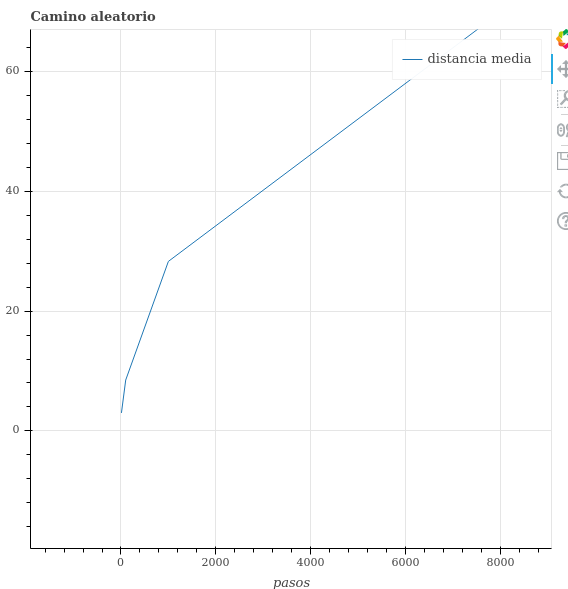